In [54]:
import pandas as pd
import numpy as np
import geopandas as gpd
import maup
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [104]:
neighborhoods = gpd.read_file('Boston_Neighborhoods.shp')
precincts = gpd.read_file('Precincts.shp')


In [105]:
precincts = precincts[['WARD_PRECI', 'geometry']]
precincts = precincts.set_crs(epsg=26986)
precincts.head()

,WARD_PRECI,geometry
0,0113,"POLYGON ((787723.729 2965812.641, 787659.076 2..."
1,0102,"POLYGON ((782820.000 2960295.100, 783161.200 2..."
2,0105,"POLYGON ((783942.500 2960316.200, 783754.100 2..."
3,0203,"POLYGON ((775776.888 2961852.579, 775644.100 2..."
4,0205,"POLYGON ((774156.600 2964357.700, 774555.300 2..."


In [106]:
precincts[precincts['WARD_PRECI'] == '0113']['geometry'].area

0    7.562361e+06
dtype: float64

In [107]:
neighborhoods = neighborhoods[['Name', 'geometry']]
neighborhoods = neighborhoods.set_crs(epsg=26986)
neighborhoods.head()

,Name,geometry
0,Roslindale,"MULTIPOLYGON (((757409.123 2924367.749, 757457..."
1,Jamaica Plain,"POLYGON ((762983.826 2944104.016, 763014.250 2..."
2,Mission Hill,"POLYGON ((766903.580 2947645.876, 766280.013 2..."
3,Longwood,"POLYGON ((764826.911 2947985.998, 764607.180 2..."
4,Bay Village,"POLYGON ((773315.750 2952419.751, 773111.500 2..."


In [108]:
join = gpd.sjoin(neighborhoods, precincts)

In [109]:
join

,Name,geometry,index_right,WARD_PRECI
0,Roslindale,"MULTIPOLYGON (((757409.123 2924367.749, 757457...",148,1814
19,Hyde Park,"POLYGON ((757421.375 2924404.428, 757451.934 2...",148,1814
0,Roslindale,"MULTIPOLYGON (((757409.123 2924367.749, 757457...",149,1822
19,Hyde Park,"POLYGON ((757421.375 2924404.428, 757451.934 2...",149,1822
0,Roslindale,"MULTIPOLYGON (((757409.123 2924367.749, 757457...",146,1811
...,...,...,...,...
23,South Boston,"POLYGON ((774838.800 2950258.201, 774877.100 2...",25,0605
24,Allston,"POLYGON ((754791.024 2951324.323, 753961.500 2...",83,2105
24,Allston,"POLYGON ((754791.024 2951324.323, 753961.500 2...",193,2103
24,Allston,"POLYGON ((754791.024 2951324.323, 753961.500 2...",82,2104


In [110]:
merge = join[['WARD_PRECI', 'Name']]
merge = merge.reset_index(drop=True)
merge = merge.rename(columns={'Name': 'NEIGHBORHOOD'})
merge

,WARD_PRECI,NEIGHBORHOOD
0,1814,Roslindale
1,1814,Hyde Park
2,1822,Roslindale
3,1822,Hyde Park
4,1811,Roslindale
...,...,...
399,0605,South Boston
400,2105,Allston
401,2103,Allston
402,2104,Allston


In [111]:
merge[merge['NEIGHBORHOOD'] == 'South Boston Waterfront']

,WARD_PRECI,NEIGHBORHOOD
385,0604,South Boston Waterfront
387,0601,South Boston Waterfront


In [112]:
len(precincts['WARD_PRECI'].unique())

255

In [113]:
len(merge['WARD_PRECI'].unique())

255

In [114]:
cols = precincts['WARD_PRECI'].unique().tolist()

props = pd.DataFrame(0, index=np.arange(len(neighborhoods['Name'])), columns = cols)
props.insert(0, 'NEIGHBORHOOD', neighborhoods['Name'])

for i in range(len(merge)):
    neighb = merge['NEIGHBORHOOD'].loc[i]
    prct = merge['WARD_PRECI'].loc[i]
    filt = props['NEIGHBORHOOD'] == neighb
    intersection = gpd.overlay(precincts[precincts['WARD_PRECI'] == prct], neighborhoods[neighborhoods['Name'] == neighb], 
                         how='intersection')
    shape1 = intersection['geometry'].loc[0]
    shape2 = neighborhoods[neighborhoods['Name'] == neighb]['geometry']
    indexes = props.index
    index = indexes[filt]
    props.loc[index, prct] = shape1.area / shape2.area

/Users/yagevlevi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/yagevlevi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/yagevlevi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [115]:
props

,NEIGHBORHOOD,0113,0102,0105,0203,0205,0204,0206,0303,0304,...,1812,1823,2003,1816,1817,1818,0502A,0115,0104,2002
0,Roslindale,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065924
1,Jamaica Plain,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Mission Hill,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Longwood,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Bay Village,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Leather District,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Chinatown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,North End,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.211189,0.121440,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Roxbury,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,South End,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [116]:
props.to_csv('Precinct_Make_Up_Of_Neighborhoods.csv')

In [117]:
cols = neighborhoods['Name'].unique().tolist()

props2 = pd.DataFrame(0, index=np.arange(len(precincts['WARD_PRECI'])), columns = cols)
props2.insert(0, 'WARD_PRECI', precincts['WARD_PRECI'])

for i in range(len(merge)):
    neighb = merge['NEIGHBORHOOD'].loc[i]
    prct = merge['WARD_PRECI'].loc[i]
    filt = props2['WARD_PRECI'] == prct
    intersection = gpd.overlay(precincts[precincts['WARD_PRECI'] == prct], neighborhoods[neighborhoods['Name'] == neighb], 
                         how='intersection')
    shape1 = intersection['geometry'].loc[0]
    shape2 = precincts[precincts['WARD_PRECI'] == prct]['geometry']
    indexes = props2.index
    index = indexes[filt]
    props2.loc[index, neighb] = shape1.area / shape2.area

/Users/yagevlevi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/yagevlevi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/yagevlevi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [119]:
props2

,WARD_PRECI,Roslindale,Jamaica Plain,Mission Hill,Longwood,Bay Village,Leather District,Chinatown,North End,Roxbury,...,Fenway,Brighton,West Roxbury,Hyde Park,Mattapan,Dorchester,South Boston Waterfront,South Boston,Allston,Harbor Islands
0,0113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,1818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000
251,0502A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
252,0115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.993271
253,0104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [120]:
props2.to_csv('Neighborhood_Make_Up_Of_Precincts.csv')

In [125]:
df11 = pd.read_csv('City Council/2011_November Municipal (General) City Council At Large Results.csv')
temp = df11['Ward/Precinct']
df11 = df11[['VOTES CAST', 'BLANKS', 'BALLOTS CAST', 'Registered Voters']]
df11.insert(0, 'WARD_PRECINCT_CODE', temp)
df11 = df11[:254]
#df11['Total'].loc[253] = 0 # MISSING DATA
df11

,WARD_PRECINCT_CODE,VOTES CAST,BLANKS,BALLOTS CAST,Registered Voters
0,101.0,583.0,249.0,208.0,1114.0
1,102.0,282.0,186.0,117.0,805.0
2,103.0,695.0,385.0,270.0,1726.0
3,104.0,217.0,167.0,96.0,548.0
4,105.0,341.0,195.0,134.0,955.0
...,...,...,...,...,...
249,2209.0,386.0,118.0,126.0,1302.0
250,2210.0,645.0,179.0,206.0,1504.0
251,2211.0,379.0,133.0,128.0,1005.0
252,2212.0,427.0,233.0,165.0,1064.0


In [128]:
df13 = pd.read_csv('City Council/2013_ November Municipal (General) City Council At Large Results.csv')
temp = df13['WP']
df13 = df13[['VOTES CAST', 'BLANKS', 'BALLOTS CAST', 'Registered Voters']]
df13.insert(0, 'WARD_PRECINCT_CODE', temp)
df13 = df13[:254]
#df11['Total'].loc[253] = 0 # MISSING DATA
df13

,WARD_PRECINCT_CODE,VOTES CAST,BLANKS,BALLOTS CAST,Registered Voters
0,101.0,1348.0,1224.0,643.0,1236.0
1,102.0,808.0,920.0,432.0,952.0
2,103.0,1801.0,1655.0,864.0,1965.0
3,104.0,499.0,657.0,289.0,655.0
4,105.0,963.0,865.0,457.0,1074.0
...,...,...,...,...,...
249,2209.0,798.0,566.0,341.0,1283.0
250,2210.0,1420.0,756.0,544.0,1532.0
251,2211.0,883.0,561.0,361.0,1065.0
252,2212.0,895.0,585.0,370.0,1144.0


In [130]:
df15 = pd.read_csv('City Council/2015_November Municipal (General) City Council At Large Results.csv')
temp = df15['WP']
df15 = df15[['VOTES CAST', 'BLANKS', 'BALLOTS CAST', 'Registered Voters']]
df15.insert(0, 'WARD_PRECINCT_CODE', temp)
df15 = df15[:254]
#df11['Total'].loc[253] = 0 # MISSING DATA
df15

,WARD_PRECINCT_CODE,VOTES CAST,BLANKS,BALLOTS CAST,Registered Voters
0,101.0,479.0,217.0,174.0,1286.0
1,102.0,249.0,179.0,107.0,949.0
2,103.0,731.0,385.0,279.0,2074.0
3,104.0,120.0,120.0,60.0,669.0
4,105.0,229.0,119.0,87.0,1119.0
...,...,...,...,...,...
249,2209.0,250.0,122.0,93.0,1236.0
250,2210.0,491.0,189.0,170.0,1500.0
251,2211.0,319.0,141.0,115.0,1057.0
252,2212.0,368.0,184.0,138.0,1166.0


In [135]:
df17 = pd.read_csv('City Council/2017_November Municipal (General) City Council At Large_Results.csv')
temp = df17['Ward_Precinct']
df17 = df17[['VOTES CAST', 'BLANKS', 'BALLOTS CAST', 'Registered Voters']]
df17.insert(0, 'WARD_PRECINCT_CODE', temp)
df17 = df17[:254]
#df17['Total'].loc[253] = 0 # MISSING DATA
df17

,WARD_PRECINCT_CODE,VOTES CAST,BLANKS,BALLOTS CAST,Registered Voters
0,101.0,1204.0,776.0,495.0,1397.0
1,102.0,601.0,591.0,298.0,1035.0
2,103.0,1565.0,1279.0,711.0,2379.0
3,104.0,467.0,453.0,230.0,798.0
4,105.0,806.0,614.0,355.0,1255.0
...,...,...,...,...,...
249,2209.0,759.0,377.0,284.0,1328.0
250,2210.0,1080.0,484.0,391.0,1455.0
251,2211.0,648.0,412.0,265.0,1041.0
252,2212.0,739.0,397.0,284.0,1200.0


df19 = pd.read_csv('City Council/2019_November Municipal (General) City Council At Large Results.csv')
temp = df19['WP']
df19 = df19[['Ballots', 'Voters', 'Total']]
df19.insert(0, 'WARD_PRECINCT_CODE', temp)
df19.columns = ['WARD_PRECINCT_CODE', 'BALLOTS CAST','Registered Voters', 'Total']
df19 = df19.drop([0])
df19 = df19.reset_index(drop=True)
df19.loc[253] = [2213.0, 0, 0, 0] # MISSING DATA
df19

df19[df19['WARD_PRECINCT_CODE'] == 604.0]

df19[df19['WARD_PRECINCT_CODE'] == 601.0]

In [139]:
adjusted11 = pd.DataFrame(0, index=np.arange(len(neighborhoods['Name'])),
                        columns=['YEAR', 'VOTES_CAST', 'BLANKS', 'BALLOTS_CAST', 'REGISTERED_VOTERS'])
adjusted11.insert(0, 'NEIGHBORHOOD', neighborhoods['Name'])

for i in range(len(adjusted11)):
    neighb = adjusted11['NEIGHBORHOOD'].loc[i]
    temp = props2[['WARD_PRECI', neighb]]
    for n in range(len(temp)):
        if temp[neighb].loc[n] != 0:
            dec = temp[neighb].loc[n]
            adjusted11['YEAR'].loc[i] = 2011
            if temp['WARD_PRECI'].loc[n] == '0502A':
                adjusted11['VOTES_CAST'].loc[i] += int(df11[df11['WARD_PRECINCT_CODE'] == 502]['VOTES CAST']) * dec
                adjusted11['BLANKS'].loc[i] += int(df11[df11['WARD_PRECINCT_CODE'] == 502]['BLANKS']) * dec
                adjusted11['BALLOTS_CAST'].loc[i] += int(df11[df11['WARD_PRECINCT_CODE'] == 502]['BALLOTS CAST']) * dec
                adjusted11['REGISTERED_VOTERS'].loc[i] += int(df11[df11['WARD_PRECINCT_CODE'] == 502]['Registered Voters']) * dec
            else:
                filt = df11['WARD_PRECINCT_CODE'] == int(temp['WARD_PRECI'].loc[n])
                adjusted11['VOTES_CAST'].loc[i] += int(df11[filt]['VOTES CAST']) * dec
                adjusted11['BLANKS'].loc[i] += int(df11[filt]['BLANKS']) * dec
                adjusted11['BALLOTS_CAST'].loc[i] += int(df11[filt]['BALLOTS CAST']) * dec
                adjusted11['REGISTERED_VOTERS'].loc[i] += int(df11[filt]['Registered Voters']) * dec

/Users/yagevlevi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/yagevlevi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/yagevlevi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [140]:
adjusted11

,NEIGHBORHOOD,YEAR,VOTES_CAST,BLANKS,BALLOTS_CAST,REGISTERED_VOTERS
0,Roslindale,2011,10660.408590,3741.430751,3600.459835,16694.745508
1,Jamaica Plain,2011,16148.836999,5541.979775,5422.704193,26678.090065
2,Mission Hill,2011,2557.772036,857.346246,853.779571,6505.266285
3,Longwood,2011,200.995646,66.965889,66.990384,850.912046
4,Bay Village,2011,482.663506,323.397821,201.515332,875.740065
5,Leather District,2011,121.468050,99.504698,55.243187,257.332809
6,Chinatown,2011,647.865740,516.379942,291.061420,1343.275955
7,North End,2011,1830.398902,876.386409,676.696328,5875.126623
8,Roxbury,2011,12457.143890,5725.585248,4545.682284,26665.827201
9,South End,2011,7734.548454,3531.914482,2816.615734,16302.528860


In [142]:
adjusted13 = pd.DataFrame(0, index=np.arange(len(neighborhoods['Name'])),
                        columns=['YEAR', 'VOTES_CAST', 'BLANKS', 'BALLOTS_CAST', 'REGISTERED_VOTERS'])
adjusted13.insert(0, 'NEIGHBORHOOD', neighborhoods['Name'])

for i in range(len(adjusted13)):
    neighb = adjusted13['NEIGHBORHOOD'].loc[i]
    temp = props2[['WARD_PRECI', neighb]]
    for n in range(len(temp)):
        if temp[neighb].loc[n] != 0:
            dec = temp[neighb].loc[n]
            adjusted13['YEAR'].loc[i] = 2013
            if temp['WARD_PRECI'].loc[n] == '0502A':
                adjusted13['VOTES_CAST'].loc[i] += int(df13[df13['WARD_PRECINCT_CODE'] == 502]['VOTES CAST']) * dec
                adjusted13['BLANKS'].loc[i] += int(df13[df13['WARD_PRECINCT_CODE'] == 502]['BLANKS']) * dec
                adjusted13['BALLOTS_CAST'].loc[i] += int(df13[df13['WARD_PRECINCT_CODE'] == 502]['BALLOTS CAST']) * dec
                adjusted13['REGISTERED_VOTERS'].loc[i] += int(df13[df13['WARD_PRECINCT_CODE'] == 502]['Registered Voters']) * dec
            else:
                filt = df13['WARD_PRECINCT_CODE'] == int(temp['WARD_PRECI'].loc[n])
                adjusted13['VOTES_CAST'].loc[i] += int(df13[filt]['VOTES CAST']) * dec
                adjusted13['BLANKS'].loc[i] += int(df13[filt]['BLANKS']) * dec
                adjusted13['BALLOTS_CAST'].loc[i] += int(df13[filt]['BALLOTS CAST']) * dec
                adjusted13['REGISTERED_VOTERS'].loc[i] += int(df13[filt]['Registered Voters']) * dec

/Users/yagevlevi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/yagevlevi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/yagevlevi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [143]:
adjusted13

,NEIGHBORHOOD,YEAR,VOTES_CAST,BLANKS,BALLOTS_CAST,REGISTERED_VOTERS
0,Roslindale,2013,21010.962311,12671.856714,8420.704756,17787.208432
1,Jamaica Plain,2013,31117.774824,17738.602820,12214.094411,28070.814378
2,Mission Hill,2013,4746.933927,3463.431060,2052.591247,7119.002929
3,Longwood,2013,393.479417,299.117196,173.149153,1051.152697
4,Bay Village,2013,771.553762,663.607020,358.790196,976.829534
5,Leather District,2013,164.992985,192.313252,89.326559,287.264572
6,Chinatown,2013,903.107767,1005.694497,477.200566,1499.365705
7,North End,2013,4873.201562,3921.449558,2198.662780,6128.990545
8,Roxbury,2013,19990.374015,17908.962570,9474.834146,29205.705272
9,South End,2013,14688.842115,10205.632436,6223.618638,17092.840047


In [144]:
adjusted15 = pd.DataFrame(0, index=np.arange(len(neighborhoods['Name'])),
                        columns=['YEAR', 'VOTES_CAST', 'BLANKS', 'BALLOTS_CAST', 'REGISTERED_VOTERS'])
adjusted15.insert(0, 'NEIGHBORHOOD', neighborhoods['Name'])

for i in range(len(adjusted15)):
    neighb = adjusted15['NEIGHBORHOOD'].loc[i]
    temp = props2[['WARD_PRECI', neighb]]
    for n in range(len(temp)):
        if temp[neighb].loc[n] != 0:
            dec = temp[neighb].loc[n]
            adjusted15['YEAR'].loc[i] = 2015
            if temp['WARD_PRECI'].loc[n] == '0502A':
                adjusted15['VOTES_CAST'].loc[i] += int(df15[df15['WARD_PRECINCT_CODE'] == 502]['VOTES CAST']) * dec
                adjusted15['BLANKS'].loc[i] += int(df15[df15['WARD_PRECINCT_CODE'] == 502]['BLANKS']) * dec
                adjusted15['BALLOTS_CAST'].loc[i] += int(df15[df15['WARD_PRECINCT_CODE'] == 502]['BALLOTS CAST']) * dec
                adjusted15['REGISTERED_VOTERS'].loc[i] += int(df15[df15['WARD_PRECINCT_CODE'] == 502]['Registered Voters']) * dec
            else:
                filt = df15['WARD_PRECINCT_CODE'] == int(temp['WARD_PRECI'].loc[n])
                adjusted15['VOTES_CAST'].loc[i] += int(df15[filt]['VOTES CAST']) * dec
                adjusted15['BLANKS'].loc[i] += int(df15[filt]['BLANKS']) * dec
                adjusted15['BALLOTS_CAST'].loc[i] += int(df15[filt]['BALLOTS CAST']) * dec
                adjusted15['REGISTERED_VOTERS'].loc[i] += int(df15[filt]['Registered Voters']) * dec

/Users/yagevlevi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/yagevlevi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/yagevlevi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [145]:
adjusted15

,NEIGHBORHOOD,YEAR,VOTES_CAST,BLANKS,BALLOTS_CAST,REGISTERED_VOTERS
0,Roslindale,2015,8893.035561,4110.154438,3250.797500,17980.981102
1,Jamaica Plain,2015,12638.630138,4916.457971,4388.772027,27959.995435
2,Mission Hill,2015,1759.289481,831.810800,647.775070,7037.705777
3,Longwood,2015,137.279623,53.647640,47.731816,978.815004
4,Bay Village,2015,312.116502,127.633750,109.937563,960.460561
5,Leather District,2015,98.232431,44.261511,35.623485,306.482505
6,Chinatown,2015,508.353904,226.464211,183.704529,1583.394013
7,North End,2015,1593.710227,780.204705,593.478733,5855.928538
8,Roxbury,2015,9050.906116,6283.458146,3833.591065,29802.342132
9,South End,2015,5270.201491,2251.787435,1880.497231,16843.663062


In [146]:
adjusted17 = pd.DataFrame(0, index=np.arange(len(neighborhoods['Name'])),
                        columns=['YEAR', 'VOTES_CAST', 'BLANKS', 'BALLOTS_CAST', 'REGISTERED_VOTERS'])
adjusted17.insert(0, 'NEIGHBORHOOD', neighborhoods['Name'])

for i in range(len(adjusted17)):
    neighb = adjusted17['NEIGHBORHOOD'].loc[i]
    temp = props2[['WARD_PRECI', neighb]]
    for n in range(len(temp)):
        if temp[neighb].loc[n] != 0:
            dec = temp[neighb].loc[n]
            adjusted17['YEAR'].loc[i] = 2017
            if temp['WARD_PRECI'].loc[n] == '0502A':
                adjusted17['VOTES_CAST'].loc[i] += int(df17[df17['WARD_PRECINCT_CODE'] == 502]['VOTES CAST']) * dec
                adjusted17['BLANKS'].loc[i] += int(df17[df17['WARD_PRECINCT_CODE'] == 502]['BLANKS']) * dec
                adjusted17['BALLOTS_CAST'].loc[i] += int(df17[df17['WARD_PRECINCT_CODE'] == 502]['BALLOTS CAST']) * dec
                adjusted17['REGISTERED_VOTERS'].loc[i] += int(df17[df17['WARD_PRECINCT_CODE'] == 502]['Registered Voters']) * dec
            else:
                filt = df17['WARD_PRECINCT_CODE'] == int(temp['WARD_PRECI'].loc[n])
                adjusted17['VOTES_CAST'].loc[i] += int(df17[filt]['VOTES CAST']) * dec
                adjusted17['BLANKS'].loc[i] += int(df17[filt]['BLANKS']) * dec
                adjusted17['BALLOTS_CAST'].loc[i] += int(df17[filt]['BALLOTS CAST']) * dec
                adjusted17['REGISTERED_VOTERS'].loc[i] += int(df17[filt]['Registered Voters']) * dec

/Users/yagevlevi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/yagevlevi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/yagevlevi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [147]:
adjusted17

,NEIGHBORHOOD,YEAR,VOTES_CAST,BLANKS,BALLOTS_CAST,REGISTERED_VOTERS
0,Roslindale,2017,16670.244888,8336.595048,6251.709984,18449.471852
1,Jamaica Plain,2017,27619.448251,11949.671280,9892.279883,29021.852943
2,Mission Hill,2017,3560.331588,2507.819167,1517.037689,7124.679169
3,Longwood,2017,313.754310,189.809209,125.890880,1011.168656
4,Bay Village,2017,691.699718,428.468933,280.042163,999.392173
5,Leather District,2017,203.428851,146.377705,87.451639,382.282854
6,Chinatown,2017,1061.778536,750.211109,452.997411,1935.439636
7,North End,2017,4243.320905,3594.605694,1959.481650,6227.171853
8,Roxbury,2017,16759.513054,15471.657492,8057.792636,30281.840036
9,South End,2017,12935.351739,7714.885356,5162.559274,17651.813782


adjusted19 = pd.DataFrame(0, index=np.arange(len(neighborhoods['Name'])),
                        columns=['YEAR', 'BALLOTS_CAST', 'REGISTERED_VOTERS', 'TOTAL'])
adjusted19.insert(0, 'NEIGHBORHOOD', neighborhoods['Name'])

for i in range(len(adjusted19)):
    neighb = adjusted19['NEIGHBORHOOD'].loc[i]
    temp = props2[['WARD_PRECI', neighb]]
    for n in range(len(temp)):
        if temp[neighb].loc[n] != 0:
            dec = temp[neighb].loc[n]
            adjusted19['YEAR'].loc[i] = 2019
            if temp['WARD_PRECI'].loc[n] == '0502A':
                adjusted19['BALLOTS_CAST'].loc[i] += int(df19[df19['WARD_PRECINCT_CODE'] == 502]['BALLOTS CAST']) * dec
                adjusted19['REGISTERED_VOTERS'].loc[i] += int(df19[df19['WARD_PRECINCT_CODE'] == 502]['Registered Voters']) * dec
                adjusted19['TOTAL'].loc[i] += int(df19[df19['WARD_PRECINCT_CODE'] == 502]['Total']) * dec
            else:
                filt = df19['WARD_PRECINCT_CODE'] == int(temp['WARD_PRECI'].loc[n])
                adjusted19['BALLOTS_CAST'].loc[i] += int(df19[filt]['BALLOTS CAST']) * dec
                adjusted19['REGISTERED_VOTERS'].loc[i] += int(df19[filt]['Registered Voters']) * dec
                adjusted19['TOTAL'].loc[i] += int(df19[filt]['Total']) * dec

adjusted19

In [148]:
finished = pd.concat([adjusted11, adjusted13, adjusted15, adjusted17])
finished = finished.reset_index(drop=True)
finished

,NEIGHBORHOOD,YEAR,VOTES_CAST,BLANKS,BALLOTS_CAST,REGISTERED_VOTERS
0,Roslindale,2011,10660.408590,3741.430751,3600.459835,16694.745508
1,Jamaica Plain,2011,16148.836999,5541.979775,5422.704193,26678.090065
2,Mission Hill,2011,2557.772036,857.346246,853.779571,6505.266285
3,Longwood,2011,200.995646,66.965889,66.990384,850.912046
4,Bay Village,2011,482.663506,323.397821,201.515332,875.740065
...,...,...,...,...,...,...
99,Dorchester,2017,46755.388366,32820.823657,19894.053006,70921.773380
100,South Boston Waterfront,2017,2676.611123,1546.612485,1055.805902,5191.388523
101,South Boston,2017,16214.305243,12993.962232,7302.066869,26275.844914
102,Allston,2017,5567.754791,2493.173640,2015.232108,11802.013162


In [149]:
finished.to_csv('2011-2017_Estimated_Voter_Data_Per_Neighborhood.csv')

In [40]:
finished['Ballots Cast / Total'] = pd.Series([0 for x in range(len(finished))])
for i in range(len(finished)):
    finished['Ballots Cast / Total'].loc[i] = finished['BALLOTS_CAST'].loc[i]/finished['TOTAL'].loc[i]

finished

/Users/yagevlevi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,NEIGHBORHOOD,YEAR,BALLOTS_CAST,REGISTERED_VOTERS,TOTAL,Ballots Cast / Total
0,Roslindale,2011,3600.459835,16694.745508,20596.399640,0.174810
1,Jamaica Plain,2011,5422.704193,26678.090065,32120.961975,0.168821
2,Mission Hill,2011,853.779571,6505.266285,13294.722160,0.064219
3,Longwood,2011,66.990384,850.912046,5429.774204,0.012338
4,Bay Village,2011,201.515332,875.740065,1430.515534,0.140869
...,...,...,...,...,...,...
125,Dorchester,2019,10879.439201,73202.867779,85454.026475,0.127313
126,South Boston Waterfront,2019,524.413869,6028.861486,4302.794409,0.121878
127,South Boston,2019,4081.065249,27631.654908,27501.191678,0.148396
128,Allston,2019,1538.557098,12205.079987,25647.843622,0.059988


In [41]:
finished['Ballots Cast / Registered Voters'] = pd.Series([0 for x in range(len(finished))])
for i in range(len(finished)):
    finished['Ballots Cast / Registered Voters'].loc[i] = finished['BALLOTS_CAST'].loc[i]/finished['REGISTERED_VOTERS'].loc[i]

finished

/Users/yagevlevi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,NEIGHBORHOOD,YEAR,BALLOTS_CAST,REGISTERED_VOTERS,TOTAL,Ballots Cast / Total,Ballots Cast / Registered Voters
0,Roslindale,2011,3600.459835,16694.745508,20596.399640,0.174810,0.215664
1,Jamaica Plain,2011,5422.704193,26678.090065,32120.961975,0.168821,0.203264
2,Mission Hill,2011,853.779571,6505.266285,13294.722160,0.064219,0.131244
3,Longwood,2011,66.990384,850.912046,5429.774204,0.012338,0.078728
4,Bay Village,2011,201.515332,875.740065,1430.515534,0.140869,0.230109
...,...,...,...,...,...,...,...
125,Dorchester,2019,10879.439201,73202.867779,85454.026475,0.127313,0.148620
126,South Boston Waterfront,2019,524.413869,6028.861486,4302.794409,0.121878,0.086984
127,South Boston,2019,4081.065249,27631.654908,27501.191678,0.148396,0.147695
128,Allston,2019,1538.557098,12205.079987,25647.843622,0.059988,0.126059


In [42]:
finished['Registered Voter %'] = pd.Series([0 for x in range(len(finished))])
for i in range(len(finished)):
    finished['Registered Voter %'].loc[i] = finished['REGISTERED_VOTERS'].loc[i]/finished['TOTAL'].loc[i]

finished

/Users/yagevlevi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,NEIGHBORHOOD,YEAR,BALLOTS_CAST,REGISTERED_VOTERS,TOTAL,Ballots Cast / Total,Ballots Cast / Registered Voters,Registered Voter %
0,Roslindale,2011,3600.459835,16694.745508,20596.399640,0.174810,0.215664,0.810566
1,Jamaica Plain,2011,5422.704193,26678.090065,32120.961975,0.168821,0.203264,0.830551
2,Mission Hill,2011,853.779571,6505.266285,13294.722160,0.064219,0.131244,0.489312
3,Longwood,2011,66.990384,850.912046,5429.774204,0.012338,0.078728,0.156712
4,Bay Village,2011,201.515332,875.740065,1430.515534,0.140869,0.230109,0.612185
...,...,...,...,...,...,...,...,...
125,Dorchester,2019,10879.439201,73202.867779,85454.026475,0.127313,0.148620,0.856635
126,South Boston Waterfront,2019,524.413869,6028.861486,4302.794409,0.121878,0.086984,1.401150
127,South Boston,2019,4081.065249,27631.654908,27501.191678,0.148396,0.147695,1.004744
128,Allston,2019,1538.557098,12205.079987,25647.843622,0.059988,0.126059,0.475872


In [43]:
finished.to_csv('Neighborhood_Voter_Data.csv')

<function matplotlib.pyplot.show(close=None, block=None)>

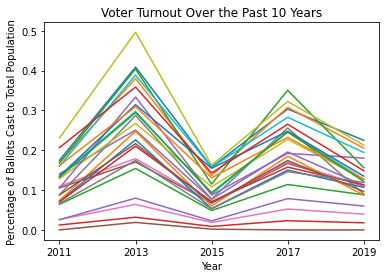

In [67]:
dictionary = {}
neighborhood_groups = finished.groupby(finished.NEIGHBORHOOD)

for n in range(len(finished)):
    temp = neighborhood_groups.get_group(finished['NEIGHBORHOOD'].loc[n])
    dictionary[finished['NEIGHBORHOOD'].loc[n]] = temp['Ballots Cast / Total'].tolist()
    
years = ['2011', '2013', '2015', '2017', '2019']
values = list(dictionary.values())
labels = list(dictionary.keys())
for x in range(len(values)):
    plt.plot(years, values[x], label=labels[x])

plt.title('Voter Turnout Over the Past 10 Years')
plt.xlabel('Year')
plt.ylabel('Percentage of Ballots Cast to Total Population')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

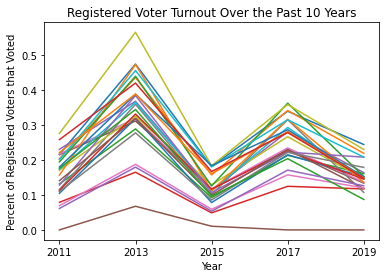

In [66]:
dictionary = {}
neighborhood_groups = finished.groupby(finished.NEIGHBORHOOD)

for n in range(len(finished)):
    temp = neighborhood_groups.get_group(finished['NEIGHBORHOOD'].loc[n])
    dictionary[finished['NEIGHBORHOOD'].loc[n]] = temp['Ballots Cast / Registered Voters'].tolist()
    
years = ['2011', '2013', '2015', '2017', '2019']
values = list(dictionary.values())
labels = list(dictionary.keys())
for x in range(len(values)):
    plt.plot(years, values[x], label=labels[x])

plt.title('Registered Voter Turnout Over the Past 10 Years')
plt.xlabel('Year')
plt.ylabel('Percent of Registered Voters that Voted')
plt.show

In [100]:
df1015 = pd.read_csv('Precinct_Demographics_Based_On_2011-15_ACS_Census_Data.csv')
df1519 = pd.read_csv('Precinct_Demographics_Based_On_2015-19_ACS_Census_Data.csv')
df1015 = df1015.drop('Unnamed: 0', axis=1)
df1519 = df1519.drop('Unnamed: 0', axis=1)

In [96]:
neigh1015 = pd.DataFrame(0, index=np.arange(len(neighborhoods['Name'])),
                        columns=df1015.columns[1:])
neigh1015.insert(0, 'NEIGHBORHOOD', neighborhoods['Name'])

for i in range(len(neigh1015)):
    neighb = neigh1015['NEIGHBORHOOD'].loc[i]
    temp = props2[['WARD_PRECI', neighb]]
    for n in range(len(temp)):
        if temp[neighb].loc[n] != 0:
            dec = temp[neighb].loc[n]
            filt = df1015['WARD_PRECI'] == temp['WARD_PRECI'].loc[n]
            neigh1015['TOTAL'].iloc[i] += df1015[filt]['TOTAL'] * dec
            neigh1015['WHITE'].iloc[i] += df1015[filt]['WHITE'] * dec
            neigh1015['AFRICAN_AMERICAN'].iloc[i] += df1015[filt]['AFRICAN_AMERICAN'] * dec
            neigh1015['NATIVE_AMERICAN'].iloc[i] += df1015[filt]['NATIVE_AMERICAN'] * dec
            neigh1015['ASIAN'].iloc[i] += df1015[filt]['ASIAN'] * dec
            neigh1015['OTHER'].iloc[i] += df1015[filt]['OTHER'] * dec

for c in neigh1015.columns:
    if c != 'NEIGHBORHOOD':
        neigh1015[c] = neigh1015[c].round().astype(int)

cols = list(neigh1015.columns)[2:]

for c in cols:
    for i in range(len(neigh1015)):
        neigh1015.loc[i, c] = "{:.0%}".format(neigh1015.loc[i, c]/neigh1015.loc[i, 'TOTAL'])

neigh1015

/Users/yagevlevi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,NEIGHBORHOOD,TOTAL,WHITE,AFRICAN_AMERICAN,NATIVE_AMERICAN,ASIAN,OTHER
0,Roslindale,29024,61%,26%,1%,2%,8%
1,Jamaica Plain,42759,60%,18%,0%,5%,13%
2,Mission Hill,13920,54%,19%,0%,15%,8%
3,Longwood,6241,64%,11%,0%,16%,6%
4,Bay Village,1399,61%,2%,0%,32%,1%
5,Leather District,537,45%,3%,0%,49%,1%
6,Chinatown,2718,46%,3%,0%,47%,1%
7,North End,6964,92%,1%,0%,4%,1%
8,Roxbury,50601,21%,55%,0%,4%,16%
9,South End,23667,62%,12%,0%,17%,5%


In [102]:
neigh1015.to_csv('Boston_Neighborhood_Demographics_Based_On_ACS_5Year_Estimates_2011-15.csv')

In [101]:
neigh1519 = pd.DataFrame(0, index=np.arange(len(neighborhoods['Name'])),
                        columns=df1519.columns[1:])
neigh1519.insert(0, 'NEIGHBORHOOD', neighborhoods['Name'])

for i in range(len(neigh1519)):
    neighb = neigh1519['NEIGHBORHOOD'].loc[i]
    temp = props2[['WARD_PRECI', neighb]]
    for n in range(len(temp)):
        if temp[neighb].loc[n] != 0:
            dec = temp[neighb].loc[n]
            filt = df1519['WARD_PRECI'] == temp['WARD_PRECI'].loc[n]
            neigh1519['TOTAL'].iloc[i] += df1519[filt]['TOTAL'] * dec
            neigh1519['WHITE'].iloc[i] += df1519[filt]['WHITE'] * dec
            neigh1519['AFRICAN_AMERICAN'].iloc[i] += df1519[filt]['AFRICAN_AMERICAN'] * dec
            neigh1519['NATIVE_AMERICAN'].iloc[i] += df1519[filt]['NATIVE_AMERICAN'] * dec
            neigh1519['ASIAN'].iloc[i] += df1519[filt]['ASIAN'] * dec
            neigh1519['OTHER'].iloc[i] += df1519[filt]['OTHER'] * dec

for c in neigh1519.columns:
    if c != 'NEIGHBORHOOD':
        neigh1519[c] = neigh1519[c].round().astype(int)

cols = list(neigh1519.columns)[2:]

for c in cols:
    for i in range(len(neigh1519)):
        neigh1519.loc[i, c] = "{:.0%}".format(neigh1519.loc[i, c]/neigh1519.loc[i, 'TOTAL'])

neigh1519

/Users/yagevlevi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,NEIGHBORHOOD,TOTAL,WHITE,AFRICAN_AMERICAN,NATIVE_AMERICAN,ASIAN,OTHER
0,Roslindale,30207,61%,24%,0%,2%,7%
1,Jamaica Plain,43871,62%,18%,0%,5%,10%
2,Mission Hill,14251,51%,19%,0%,18%,9%
3,Longwood,6549,60%,12%,0%,20%,5%
4,Bay Village,1465,64%,3%,0%,26%,3%
5,Leather District,621,48%,5%,0%,43%,1%
6,Chinatown,3113,50%,5%,0%,41%,1%
7,North End,6785,91%,2%,0%,4%,2%
8,Roxbury,53772,20%,54%,1%,4%,15%
9,South End,24202,62%,11%,0%,16%,6%


In [103]:
neigh1519.to_csv('Boston_Neighborhood_Demographics_Based_On_ACS_5Year_Estimates_2015-19.csv')